<a href="https://colab.research.google.com/github/nicolasyannick/wine-quality-ANN/blob/main/Wine_Quality_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# **The Dataset**

In [2]:
url = "https://drive.google.com/uc?id=1zpfCU58He0VHAmVItk2p9KBlJTZdRm1v"

df = pd.read_csv(url)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Transforming the Dataset for binary classification

In [3]:
# converting the 'Quality' column into binary class for the purpose of this assignment
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)


# Drop the 'Id' column
df.drop('Id', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Dataset Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


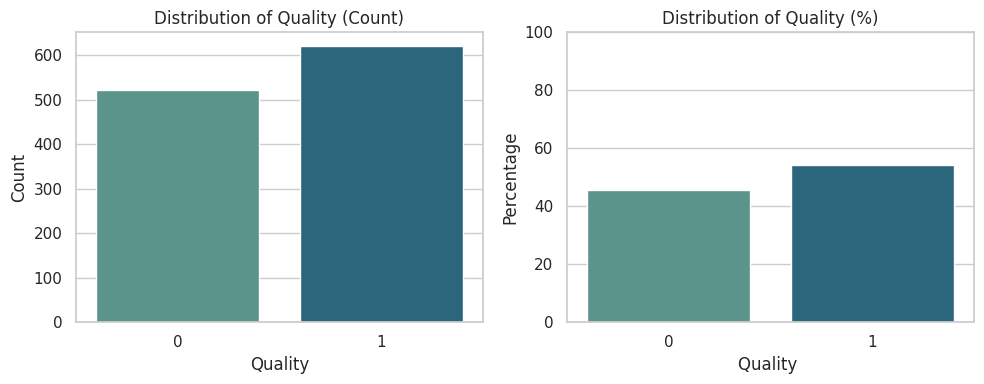

In [5]:
sns.set(style='whitegrid')

quality_class_count = df['quality'].value_counts()
quality_class_percentage = df['quality'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.countplot(data=df, x='quality', palette='crest', ax=axes[0])
axes[0].set_title('Distribution of Quality (Count)')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Count')

sns.barplot(x=quality_class_percentage.index, y=quality_class_percentage.values, palette='crest', ax=axes[1])
axes[1].set_title('Distribution of Quality (%)')
axes[1].set_xlabel('Quality ')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the plots
plt.show()